In [87]:
# этот ноутбук относится к лабе 3.3.3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from ipywidgets import interact
# from pyperclip import copy

def latex(d: pd.DataFrame, name, print_output=False) -> None:
  if print_output:
    print(d.to_latex(index=False))
    return
  with open("table "+name+".tex", 'w+') as file:
    file.write(d.to_latex(index=False))


In [88]:
data = pd.read_csv('laba333.csv').sort_values('n', ignore_index=True)
data_print = data.copy()
data_print['kV'] = (data_print['kV'] * 1000).astype('int')
latex(data_print[data_print['n'] < 8], "data<8")
latex(data_print[data_print['n'] >= 8], "data>=8")
data

/tmp/ipykernel_1631479/4287537343.py:14: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  file.write(d.to_latex(index=False))


,n,t0,t,kV
0,1,15.65,13.25,0.48
1,1,16.33,14.13,0.48
2,1,14.16,14.13,0.46
3,1,17.38,15.25,0.46
4,1,15.85,13.51,0.49
...,...,...,...,...
56,13,29.95,14.75,0.25
57,13,29.91,12.46,0.25
58,14,13.05,9.00,-0.34
59,14,14.18,20.53,-0.22


In [131]:
rho = 898 # Си
h = 10**-3 # м
eta = 1.83 * 10**-5 #Си
l = 0.725*10**-2 # Си
g = 9.81
e_podgon = -1.6022

koef = 9 * np.pi *\
  np.sqrt(\
    (2 * eta**3 * h**3) / (g * rho)
  ) * l
print(koef)

def q(t_0, t, V):
  V = 10**3 * V
  if 1==0:
    print("--> ", t_0)
  ans = koef * ((t_0 + t) / (V * (t_0**1.5) * t))
  return ans

7.646265063875116e-15


In [90]:
for i in range(len(data)):
  data['q'] = q(data['t0'], data['t'], data['kV'])*10**19

In [91]:
a = data[data['q'] < 2222]['q']
# b = data[data['q'] >=2]['q']

In [77]:
def style():
  plt.tick_params(
      axis='y',          # changes apply to the x-axis
      which='both',      # both major and minor ticks are affected
      left=False,      # ticks along the bottom edge are off
      right=False,         # ticks along the top edge are off
      labelleft=False) 
      
  plt.tick_params(
      axis='x',          # changes apply to the x-axis
      which='both',      # both major and minor ticks are affected
      top=False,      # ticks along the bottom edge are off
      bottom=True,         # ticks along the top edge are off
      labelbottom=True) 

  plt.xticks(
      ticks=np.arange(0, 14, step=1),
      labels=np.arange(0, 14, step=1),
      minor=False
  )
  plt.xticks(
      ticks=np.arange(0, 14, step=0.2),
      minor=True
  )

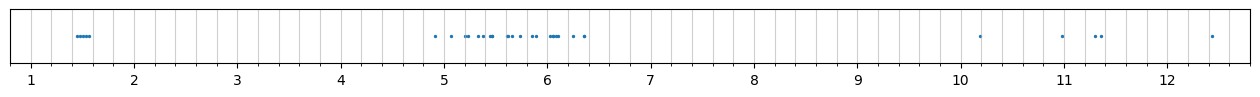

In [96]:
plt.figure(figsize=(16, 0.7))
plt.scatter(a, np.zeros(len(a)), s=2)
# plt.scatter(b, np.zeros(len(b)), s=2)

plt.grid(axis='x', which='both', alpha=0.6)
style()
plt.xlim(0.8, 12.8)

data.loc
plt.show()

In [79]:
np.median(data[(data['q'] > 1.2) & (data['q'] < 2)]['q'])

1.510771444878443

In [80]:
# latex(q_s, name="q", print_output=True)
q_s = [
       np.median(data[data['q'] < 1.2]['q']),
       np.median(data[(data['q'] > 1.2) & (data['q'] < 2)]['q']),
       np.median(data[(data['q'] > 2) & (data['q'] < 6.8)]['q']),
       np.median(data[(data['q'] > 7) & (data['q'] < 10.4)]['q']),
       np.median(data[(data['q'] > 10.5) & (data['q'] < 12)]['q']),
       np.median(data[data['q'] > 12]['q'])]
# q_s = pd.DataFrame(q_s)
print(q_s[0], q_s[1] - q_s[0])
print(q_s/ (q_s[1] - q_s[0]))

-10.781987862172409 12.292759307050853
[-0.87710071  0.12289929  0.46002372  0.8283678   0.91912494  1.01116583]


In [81]:
(1 / 9.81) * (10**-3/np.max(data['t0']))**2

8.157407471816936e-11

In [82]:
# пункт 8
v_- = 0.28
t_down = 7.53


v_+ = 0.28
t_up= 6.81

SyntaxError: invalid syntax (1916998501.py, line 2)

In [ ]:
cel = 1
d = data[(data['q'] >= cel) & (data['q'] < cel + step)]['q'].count()
print(d)

0


In [112]:
for i in range(len(data)):
  data['q'] = abs(q(data['t0'], data['t'], data['kV'])*10**19)

In [ ]:
data['q'] = abs(data['q'])

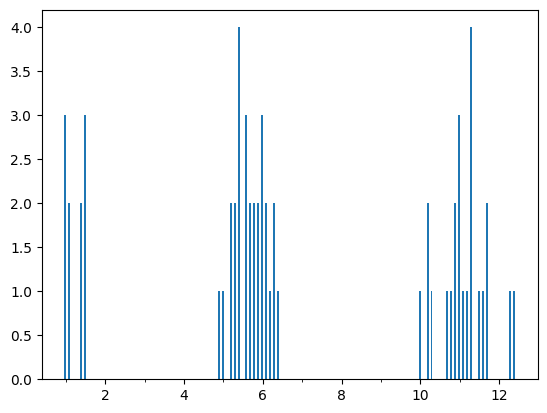

In [145]:
# a
step = 2
mn = data['q'].min()-0.001
mx = data['q'].max()+0.001
y = []
x = []

plt.xticks(
  ticks=np.arange(round(mn), round(mx), step=1),
  # labels=np.arange(0, 14, step=1),
  minor=True
)
# @interact(megastep=(0.1, 10, 0.01), milistep=(0.001, 0.5, 0.001))
def plot(step):
  for i in np.arange(mn, mx, step):
    x.append(i)
    y.append(data[(data['q'] >= i) & (data['q'] < i + step)]['q'].count())

  plt.bar(x=x, height=y, width=0.05)
  plt.show()


plot(0.1)

In [141]:
a = data[data['q'] < 4]['q'].median() / e_podgon
b = data[(data['q']> 4) &(data['q']<8)  ]['q'][1:].median() / e_podgon
c = data[data['q'] >8]['q'].median() / e_podgon
q_q = (a,b, c)
q_q

(-0.8098653411236324, -3.5825205670517875, -6.9403878137716895)